<a href="https://colab.research.google.com/github/MatiasMoreno707/lab6-lp/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SEMANA 6: ALGORITMOS PARA DIFERENTES TIPOS DE TAREAS. VALIDACIÓN CRUZADA Y MÉTRICAS DE EVALUACIÓN. CLASES DESBALANCEADAS

#### a. Lea la base de datos, realice imputaciones, tratamiento de outliers y transformaciones de datos en caso sea necesario. Además, separe la variable de clasificación del resto de variables para luego obtener los datos de entrenamiento y prueba, tomando de este último el 25% de datos.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

columnas = [
    "Sample_code_number", "Clump_Thickness", "Uniformity_Cell_Size", "Uniformity_Cell_Shape",
    "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bare_Nuclei",
    "Bland_Chromatin", "Normal_Nucleoli", "Mitoses", "Class"
]

In [79]:
df = pd.read_csv(url, names=columnas)
df.head()

,Sample_code_number,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [80]:
# tamaño del dataframe
df.shape

(699, 11)

In [81]:
# tipos de datos
df.dtypes

,0
Sample_code_number,int64
Clump_Thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,object
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64


In [82]:
df.isnull().sum()

,0
Sample_code_number,0
Clump_Thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0


In [83]:
# Eliminamos esta variable al no ser necesaria para el analisis
df.drop("Sample_code_number", axis=1, inplace=True)
df.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [84]:
# hay un dato ? que tenemos que manejarlo
df.value_counts("Bare_Nuclei")

,count
Bare_Nuclei,
1,402
10,132
2,30
5,30
3,28
8,21
4,19
?,16
9,9


In [85]:
# Reemplazamos el ? por la mediana
df["Bare_Nuclei"] = df["Bare_Nuclei"].replace("?", np.nan).astype(float)
df["Bare_Nuclei"] = df["Bare_Nuclei"].fillna(df["Bare_Nuclei"].median())


In [86]:
df['Class'] = df['Class'].replace({2: 1, 4: 2})

In [87]:
df.value_counts("Class")

,count
Class,
1,458
2,241


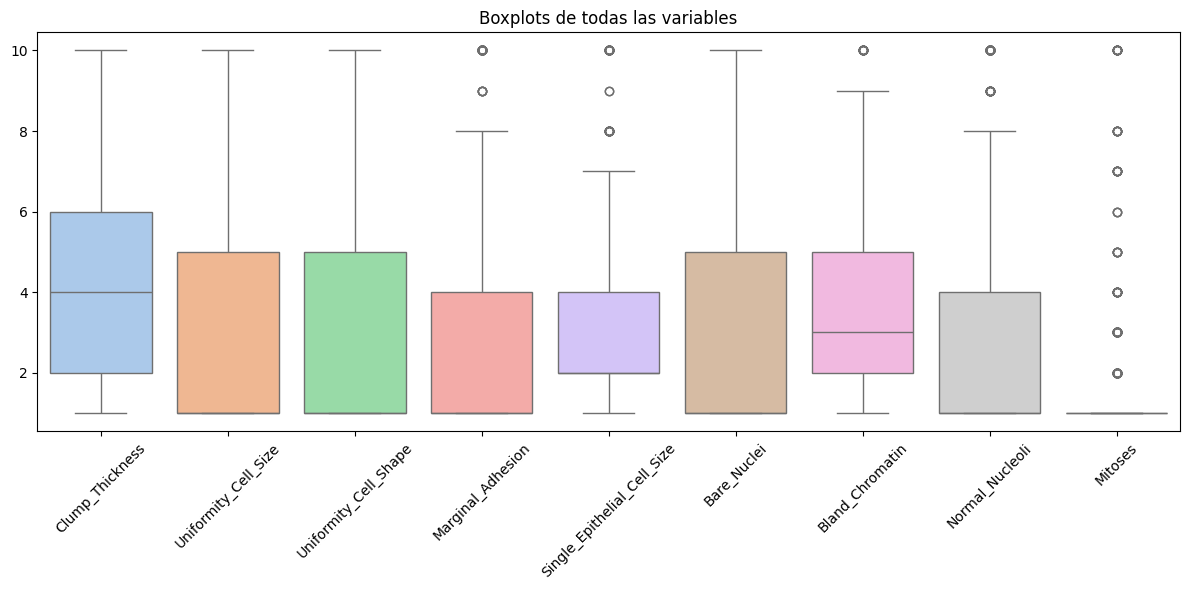

In [88]:
# En el grafico nos muestra la dispersion de los datos y algunos outliers por variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("Class", axis=1), palette="pastel")
plt.title("Boxplots de todas las variables")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [90]:
X = df.drop("Class", axis=1)  # Variables independientes
y = df["Class"]               # Variable dependiente

In [91]:
# Separamo nuestros datos de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#### b. Genere el modelo k-NN y determine la cantidad de vecinos más adecuada con el método gráfico visto en clase. Además, calcule las métricas de clasificación que se implementaron en la parte práctica e interprete sus resultados más importantes.

In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [93]:
# Creamos y entrenamos nuestro de modelo
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
y_test_pred = knn.predict(X_test)

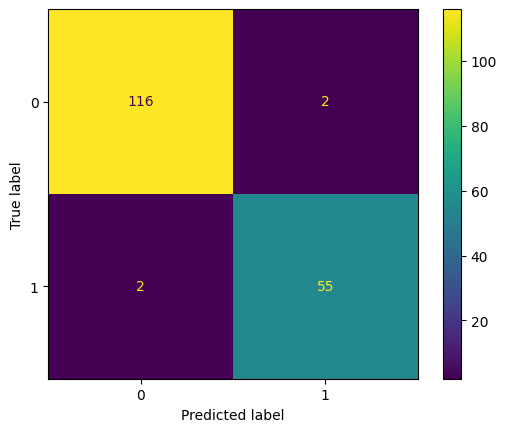

In [95]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [96]:
tn, fp, fn, tp = cm.ravel()

In [97]:
exactitud = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensibilidad = recall_score(y_test, y_test_pred)
especificidad = tn / (tn + fp)
f1 = f1_score(y_test, y_test_pred)

In [98]:
print(f"Exactitud: {exactitud:.2f}")
print(f"Precisión: {precision:.2f}")
print(f"Sensibilidad (Recall): {sensibilidad:.2f}")
print(f"Especificidad: {especificidad:.2f}")
print(f"F1 Score: {f1:.2f}")

Exactitud: 0.98
Precisión: 0.98
Sensibilidad (Recall): 0.98
Especificidad: 0.98
F1 Score: 0.98


#### c. Realice un balanceo de clases mediante la técnica SMOTE, vuelva a generar el modelo de clasificación, calcule sus métricas y compárelas con las del modelo sin balancear para ver si hubo o no mejoras.

In [99]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [100]:
# Balanceo con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Nuevo modelo con datos balanceados
knn_smote = KNeighborsClassifier()
knn_smote.fit(X_resampled, y_resampled)
y_pred_smote = knn_smote.predict(X_test)

# Matriz de confusión
cm_smote = confusion_matrix(y_test, y_pred_smote)
tn, fp, fn, tp = cm_smote.ravel()

# Métricas
print("🔹 Modelo con SMOTE:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_smote):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_smote):.2f}")
print(f"Sensibilidad (Recall): {recall_score(y_test, y_pred_smote):.2f}")
print(f"Especificidad: {tn / (tn + fp):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_smote):.2f}")

🔹 Modelo con SMOTE:
Exactitud: 0.99
Precisión: 1.00
Sensibilidad (Recall): 0.98
Especificidad: 0.98
F1 Score: 0.99
